#### 图

* 顶点（vertex）
* 边（edge）
* 度（degredd）：跟顶点相接的边的条数

无向图
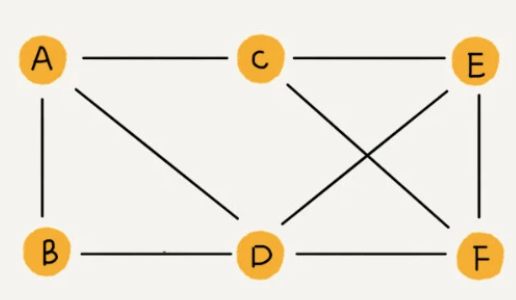

有向图
* 入度（In-degree）：有多少条边指向这个顶点（微博粉丝数）
* 出度：（Out-degree）：有多少条边是以这个顶点为起点指向其他顶点（微博关注人数）
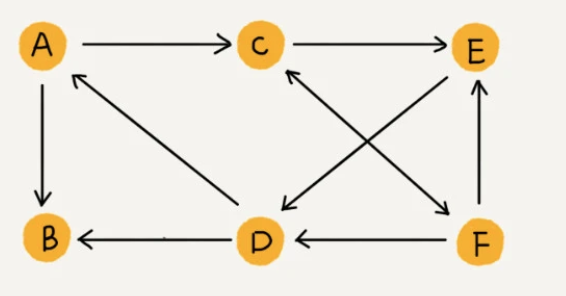

带权图（weighted graph）
* 权重（weight）：每条边有个权重（QQ好友亲密度）
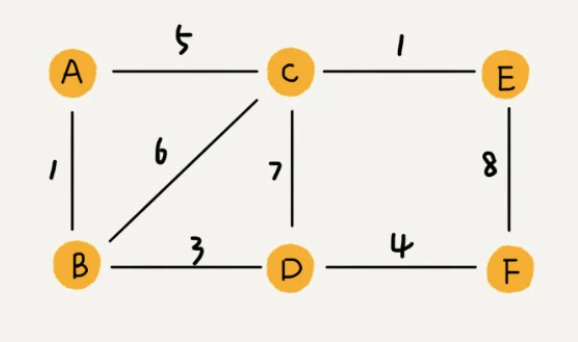




#### 存储方式

##### 邻接矩阵（Adjacency Matrix）
* 优点：
  * 简单、直观；
  * 基于数组，获取两个顶点的关系式，非常高效
  * 方便计算，很多图的运算可以转换成矩阵的运算
* 缺点：
  * 比较浪费存储空间
    * 无向图：A[i][j] = A[j][i] = 1，无向图的二维数组中，如果将其用对角线划分为上下两部分，只需要利用上面或者下面这样一半的空间就足够了，另外一半白白浪费掉了。
    * *稀疏图（Sparse Matrix）*：顶点很多，但每个顶点的边并不多
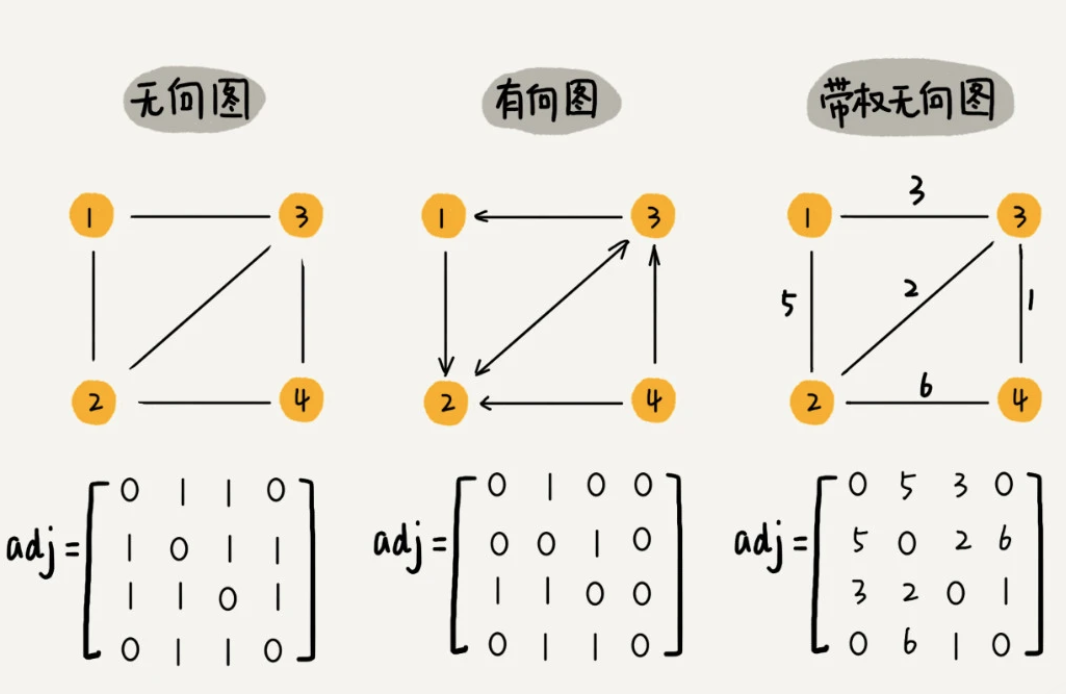


##### 领接表（Adjacency List）建
* 优点：
  * 存储节省空间
* 缺点：
  * 计算会比领接矩阵耗时
  * 链表的存储方式对缓存不友好

邻接表长的像散列表，可以将领接表同散列表一样进行升级，换乘平衡二叉树等其他更高效的数据结构

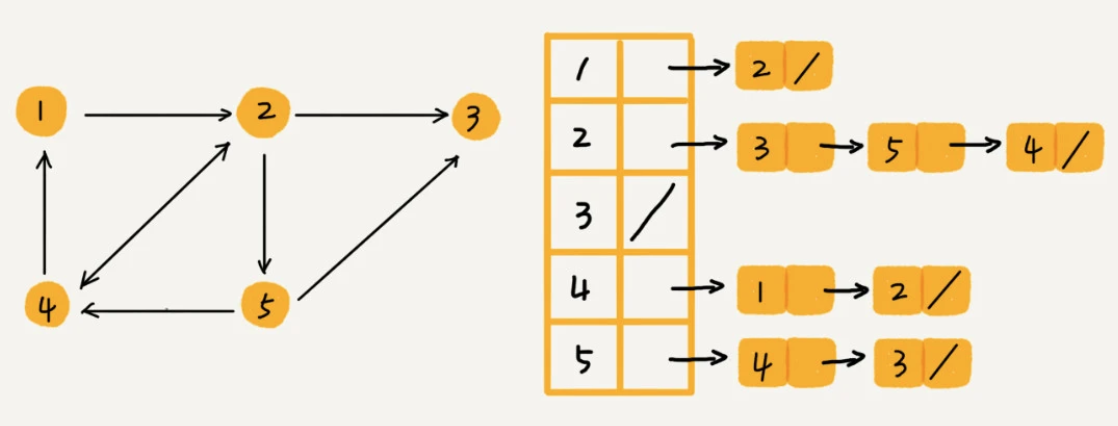


#### 实践

Q: 如何存储微博、微信等社交网络中的好友关系？
(微信是两种“图”，前者是有向图，后者是无向图。在这个问题上，两者的解决思路差不多，所以我只拿微博来讲解)

假设要支持一下几个操作：
* 判断用户 A 是否关注了用户 B；
* 判断用户 A 是否是用户 B 的粉丝；
* 用户 A 关注用户 B；
* 用户 A 取消关注用户 B；
* 根据用户名称的首字母排序，分页获取用户的粉丝列表；
* 根据用户名称的首字母排序，分页获取用户的关注列表。




确认存储方式：领接表（存储用户的关注关系） + 逆领接表（存储用户的被关注关系）
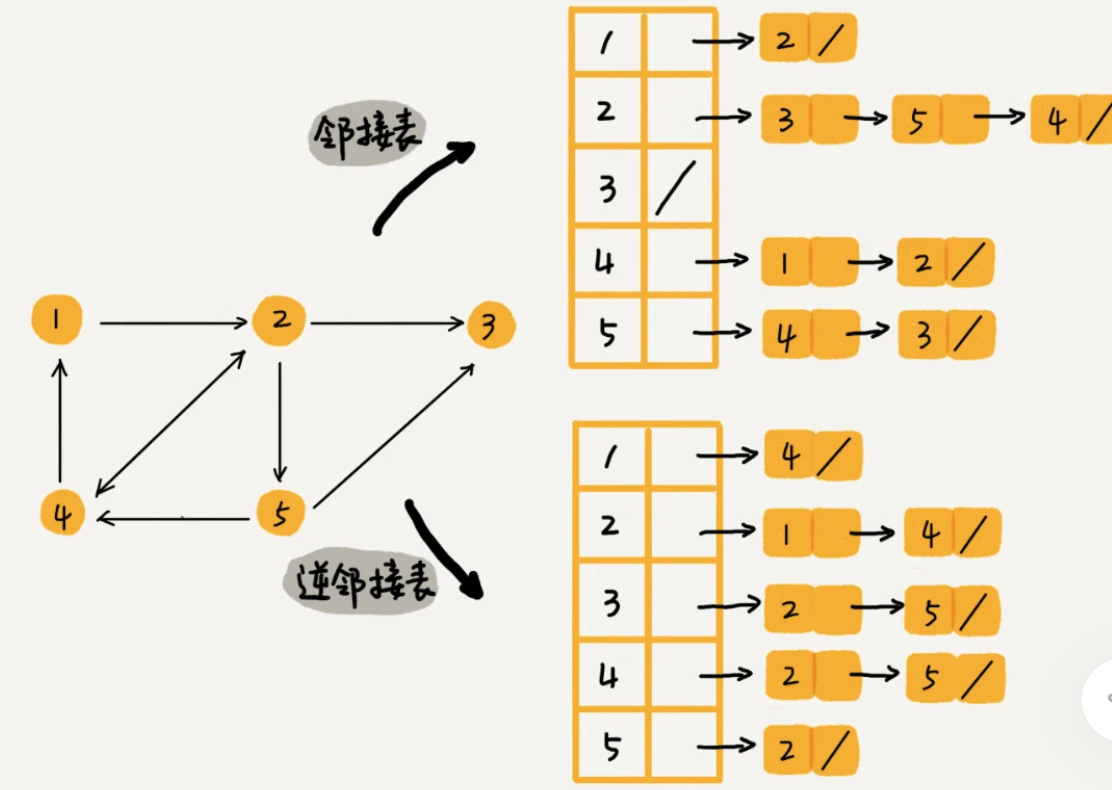

1. 社交网络是一张稀疏图，使用邻接矩阵存储比较浪费存储空间。所以，这里我们采用邻接表来存储。
2. 不过，用一个邻接表来存储这种有向图是不够的。去查找某个用户关注了哪些用户非常容易，但是如果要想知道某个用户都被哪些用户关注了，也就是用户的粉丝列表，是非常困难的。
3. 优化邻接表中的链表，支持快速查找
   1. 需要排序及分页功能，跳表最合适，时间复杂度为O(logn)，空间复杂度为O(n)
4. 对于大数据
   1. 通过哈希算法等数据分片方式，将领接表存储在不同的机器上 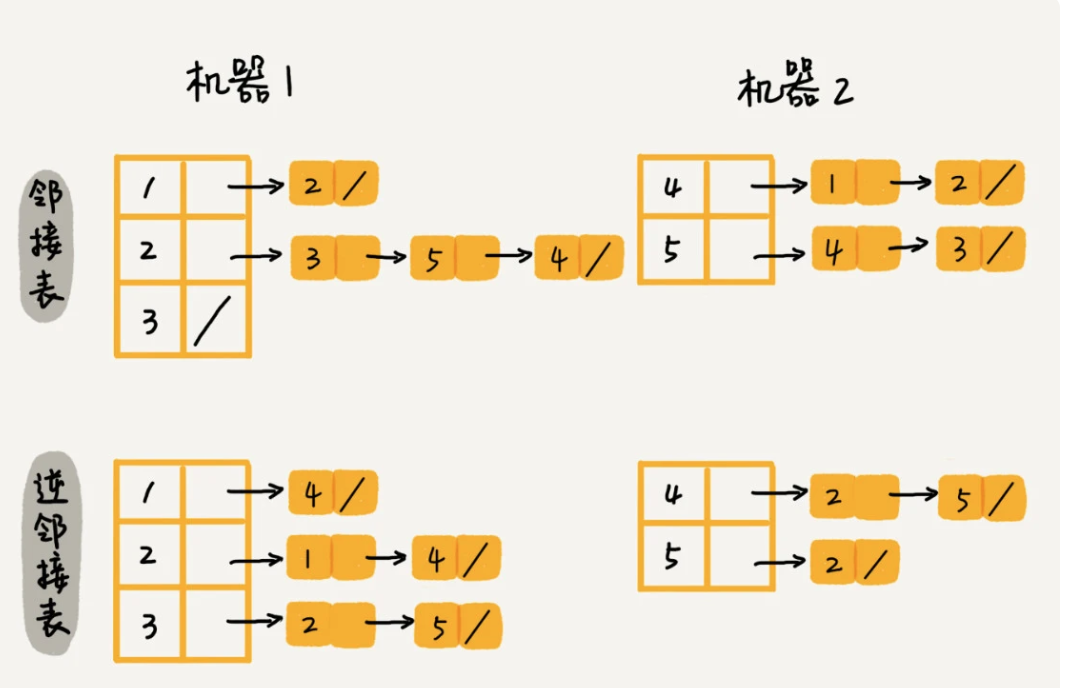
   2. 利用外部存储，常用数据库 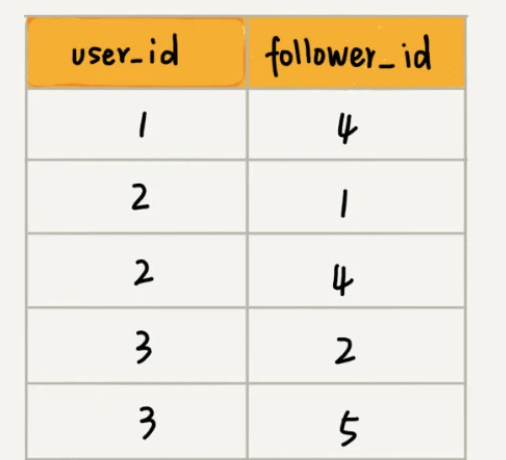




#### 广度优先搜索（Breadth-First-Search BFS）

`可获取最短路径！！！`

时间复杂度：O(E)
* V：顶点的个数
* E：边的个数
* 最坏情况下，终止顶点 t 离起始顶点 s 很远，需要遍历完整个图才能找到。
  * 这个时候，每个顶点都要进出一遍队列，每个边也都会被访问一次，所以，广度优先搜索的时间复杂度是 O(V+E)，
  * 对于一个连通图来说，也就是说一个图中的所有顶点都是连通的，E 肯定要大于等于 V-1，所以，广度优先搜索的时间复杂度也可以简写为 O(E)

空间复杂度：O(V)
* 空间消耗主要在几个辅助变量 visited 数组、queue 队列、prev 数组上。这三个存储空间的大小都不会超过顶点的个数，所以空间复杂度是 O(V)。
  

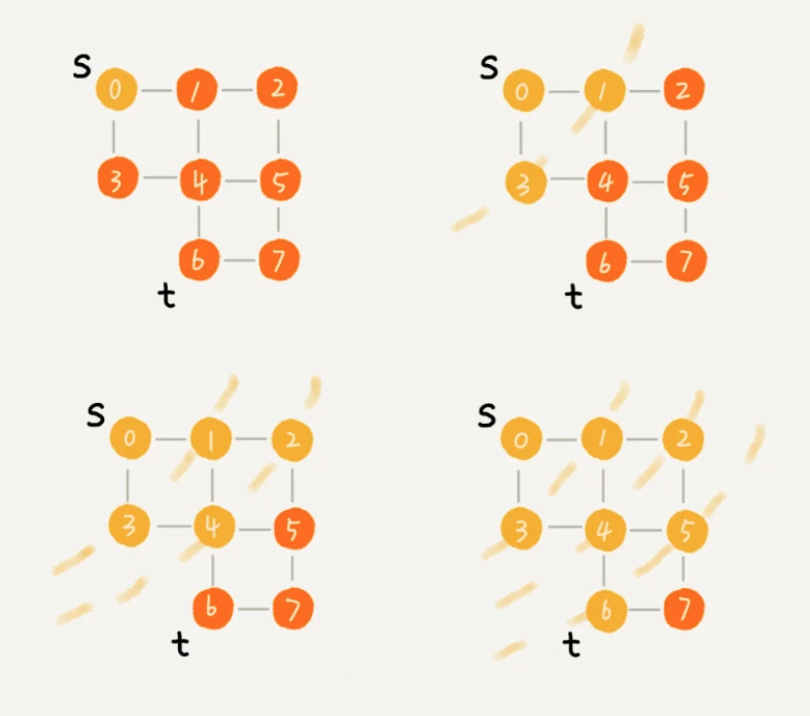

~~~

public class Graph { // 无向图
    private int v; // 顶点的个数
    private LinkedList<Integer> adj[]; // 邻接表

    public Graph(int v) {
        this.v = v;
        adj = new LinkedList[v];
        for (int i=0; i<v; ++i) {
            adj[i] = new LinkedList<>();
        }
    }

    public void addEdge(int s, int t) { // 无向图一条边存两次
        adj[s].add(t);
        adj[t].add(s);
    }

    public void bfs(int s, int t) {
        if (s == t) return;

        // 用来记录已经被访问的顶点，用来避免顶点被重复访问
        boolean[] visited = new boolean[v]; 
        visited[s]=true; // 出发点s设为已访问

        // 一个队列，用来存储已经被访问、但相连的顶点还没有被访问的顶点。
        // 因为广度优先搜索是逐层访问的，只有把第 k 层的顶点都访问完成之后，才能访问第 k+1 层的顶点。
        // 当访问到第 k 层的顶点的时候，需要把第 k 层的顶点记录下来，稍后才能通过第 k 层的顶点来找第 k+1 层的顶点。
        // 所以，用这个队列来实现记录的功能
        Queue<Integer> queue = new LinkedList<>();
        queue.add(s);

        // 来记录搜索路径。
        // 当从顶点 s 开始，广度优先搜索到顶点 t 后，prev 数组中存储的就是搜索的路径
        // 不过，这个路径是反向存储的。prev[w]存储的是，顶点 w 是从哪个前驱顶点遍历过来的。
        // 比如，通过顶点 2 的邻接表访问到顶点 3，那 prev[3]就等于 2
        int[] prev = new int[v];
        for (int i = 0; i < v; ++i) {
            prev[i] = -1;
        }
        
        while (queue.size() != 0) {
            int w = queue.poll();
            for (int i = 0; i < adj[w].size(); ++i) {
                int q = adj[w].get(i);
                if (!visited[q]) {
                    prev[q] = w;
                    if (q == t) {
                      print(prev, s, t);
                      return;
                    }
                    visited[q] = true;
                    queue.add(q);
                }
            }
        }
    }

    private void print(int[] prev, int s, int t) { // 递归打印s->t的路径
        if (prev[t] != -1 && t != s) {
            print(prev, s, prev[t]);
        }
        System.out.print(t + " ");
    }
}

~~~

#### 深度优先搜索 （Depth-First-Search DFS）

* 算法思想：回溯，适用递归
* 时间复杂度：O(E)
* 空间复杂度：O(V)

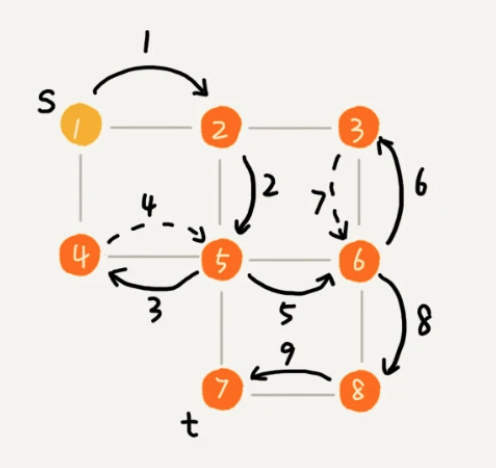

~~~

boolean found = false; // 全局变量或者类成员变量

public void dfs(int s, int t) {
  found = false;
  boolean[] visited = new boolean[v];
  int[] prev = new int[v];
  for (int i = 0; i < v; ++i) {
    prev[i] = -1;
  }
  recurDfs(s, t, visited, prev);
  print(prev, s, t);
}

private void recurDfs(int w, int t, boolean[] visited, int[] prev) {
  if (found == true) return;
  visited[w] = true;
  if (w == t) {
    found = true;
    return;
  }
  for (int i = 0; i < adj[w].size(); ++i) {
    int q = adj[w].get(i);
    if (!visited[q]) {
      prev[q] = w;
      recurDfs(q, t, visited, prev);
    }
  }
}

~~~

In [ ]:
'''
102. Binary Tree Level Order Traversal Medium

Given the root of a binary tree, return the level order traversal of its nodes' values. (i.e., from left to right, level by level).

Input: root = [3,9,20,null,null,15,7]
Output: [[3],[9,20],[15,7]]
Example 2:

Input: root = [1]
Output: [[1]]
Example 3:

Input: root = []
Output: []
'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right

import collections
from typing import Optional, List

class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        if not root:
            return []

        # visited = [] 不需要，tree 不会重复访问
        queue = collections.deque()
        queue.append(root)
        
        res = []

        while queue:
            levelSize = len(queue)
            levelNodes = []

            for _ in range(levelSize):
                node = queue.popleft()
                levelNodes.append(node.val)

                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            res.append(levelNodes)
        
        return res

In [ ]:
'''
104. Maximum Depth of Binary Tree easy

Given the root of a binary tree, return its maximum depth.

A binary tree's maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        return self.maxDepth_dfs(root)
    
    def maxDepth_dfs(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        return 1 + max(self.maxDepth_dfs(root.left), self.maxDepth_dfs(root.right))
        
    def maxDepth_dfs_depth(self, root: Optional[TreeNode]) -> int:
        def dfs(node, depth):
            if not node: return depth
            return max(dfs(node.left, depth+1), dfs(node.right, depth+1))
        return dfs(root,0)

    def maxDepth_bfs(self, root: Optional[TreeNode]) -> int:
        if not root: 
            return 0

        queue = collections.deque()
        queue.append(root)

        maxLevel = 0

        while queue:
            maxLevel += 1

            level_size = len(queue)
            for _ in range(level_size):
                node = queue.popleft()
                
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        
        return maxLevel
        

In [ ]:
'''
111. Minimum Depth of Binary Tree Easy

Given a binary tree, find its minimum depth.

The minimum depth is the number of nodes along the shortest path from the root node down to the nearest leaf node.

Note: A leaf is a node with no children.
'''

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def minDepth(self, root: Optional[TreeNode]) -> int:
        return self.minDepth_dfs_depth(root)
    
    def minDepth_dfs(self, root: Optional[TreeNode]) -> int:
        if not root:
            return 0
        # 没有左子树，这并不代表这个是最短的子树
        # 比如说 root 只有右子树
        if not root.left: 
            return 1 + self.minDepth_dfs(root.right)
        if not root.right:
            return 1 + self.minDepth_dfs(root.left)
        
        return 1 + min(self.minDepth_dfs(root.left), self.minDepth_dfs(root.right))
        

    def minDepth_dfs_depth(self, root: Optional[TreeNode]) -> int:
        def dfs(root, depth):
            if not root: 
                return depth   
            if not root.left:
                return  dfs(root.right, depth+1)
            if not root.right:
                return dfs(root.left, depth+1)
            return min(dfs(root.left, depth+1), dfs(root.right, depth+1))
        return dfs(root, 0)

    def minDepth_bfs(self, root: Optional[TreeNode]) -> int:
        if not root: 
            return 0

        queue = collections.deque()
        queue.append(root)

        minLevel = 0

        while queue:
            minLevel += 1

            level_size = len(queue)
            for _ in range(level_size):
                node = queue.popleft()
                if not node.left and not node.right:
                    return minLevel
                
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        
        return minLevel